# Name : Jung-Hyun Lee
# Student ID : 2018120206
# link : https://github.com/nmoonma7/pattern-recognition

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure

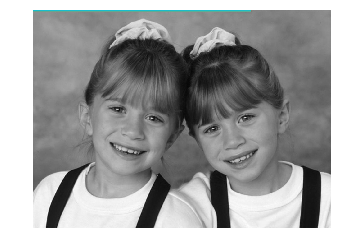

In [2]:
file_image = 'img.jpg'

im_color = io.imread(file_image)
im_gray  = color.rgb2gray(im_color)

plt.plot(im_gray)
plt.imshow(im_gray, cmap='gray')
plt.axis('off')

plt.show()

In [3]:
alpha=np.full((im_gray.shape[0], im_gray.shape[1]), 1/4)

In [4]:
alpha[:,:480]=0.75

# $ u^{(t+1)}=u^{(t)}+ \Delta t \alpha \Delta u^{(t)}$
# $ \Delta t=1/4 , \alpha = 한쪽은 1/4 , 한 쪽은 3/4로 설정 $

In [5]:

from scipy import signal


ker = np.array([[0,1/4,0],[1/4,-1,1/4],[0,1/4,0]])
im_conv= signal.convolve2d(im_gray, ker, boundary='symm', mode='same') 

1th iteration


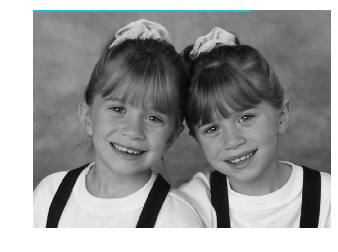

2th iteration


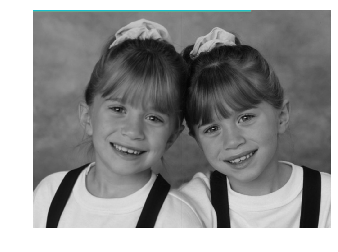

4th iteration


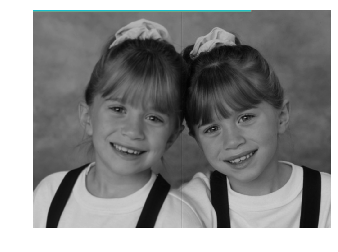

8th iteration


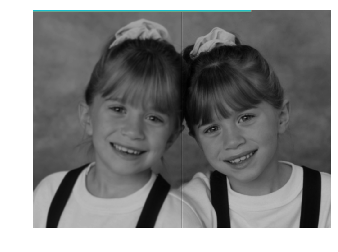

16th iteration


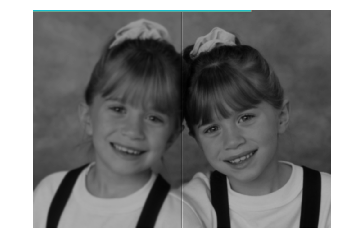

32th iteration


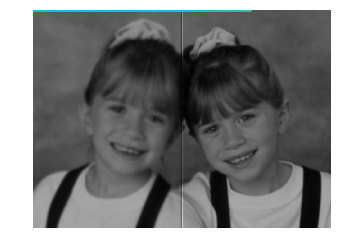

64th iteration


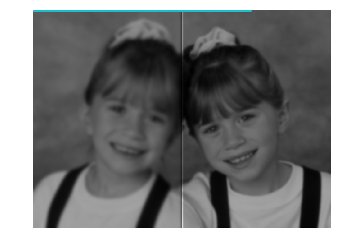

128th iteration


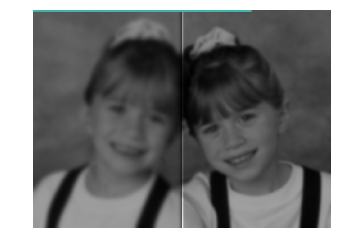

256th iteration


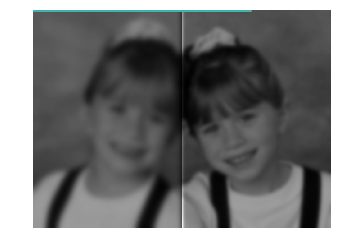

512th iteration


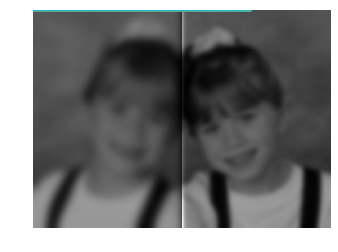

In [6]:

for i in range(10):
    
    t= 1/4
    a= 1/4
    
    j= 2**i
    u_curr= im_gray
    u_next= u_curr
    
    print('{}th iteration'.format(j))
    for i in range(j):
        
        # alpha를 곱해 놓은 이미지를 사용하면 convolution을 수행해도 상관없다 
        alpha_img= u_next*alpha
        final_result= signal.convolve2d(alpha_img, ker, boundary='symm', mode='same') 
        u_next= u_next+final_result
        
    plt.plot(u_next)
    plt.imshow(u_next, cmap='gray')
    plt.axis('off')
    plt.show()
        
    